#ass1


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/e-commerce-customer-behavior-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.84k/2.84k [00:00<00:00, 5.03MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report

In [4]:
path = "/root/.cache/kagglehub/datasets/uom190346a/e-commerce-customer-behavior-dataset/versions/1/E-commerce Customer Behavior - Sheet1.csv"
df = pd.read_csv(path)
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


# EDA

In [5]:
df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)
df.drop(columns=["Customer ID"], inplace=True)

<ipython-input-5-8e4b7a27ea0a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna(df['Satisfaction Level'].mode()[0], inplace=True)


In [6]:
df.isnull().sum()

,0
Gender,0
Age,0
City,0
Membership Type,0
Total Spend,0
Items Purchased,0
Average Rating,0
Discount Applied,0
Days Since Last Purchase,0
Satisfaction Level,0


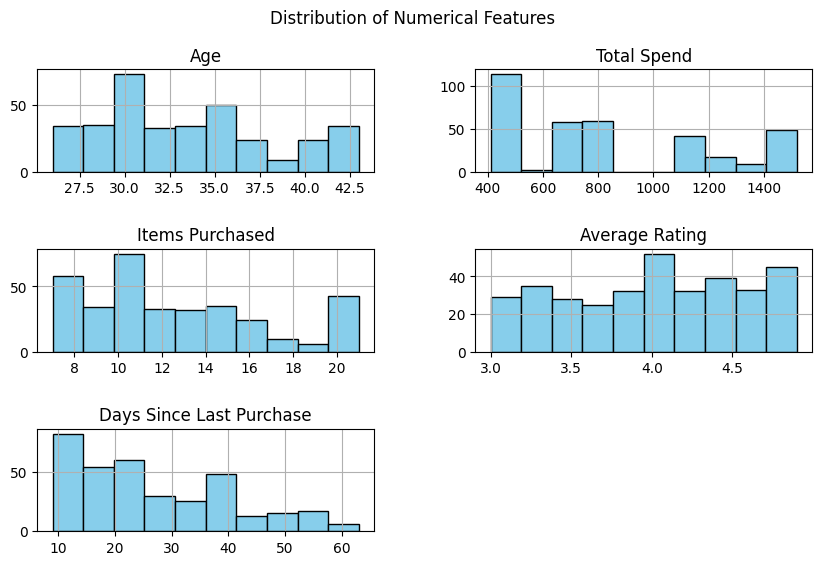

In [ ]:
df.hist(figsize=(10, 6), bins=10, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numerical Features")

plt.subplots_adjust(hspace=0.75)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Satisfaction Level"] = le.fit_transform(df["Satisfaction Level"])
df["City"] = le.fit_transform(df["City"])
df["Membership Type"] = le.fit_transform(df["Membership Type"])
df["Discount Applied"] = df["Discount Applied"].astype(int)

print(df)

     Gender  Age  City  Membership Type  Total Spend  Items Purchased  \
0         0   29     4                1      1120.20               14   
1         1   34     2                2       780.50               11   
2         0   43     0                0       510.75                9   
3         1   30     5                1      1480.30               19   
4         1   27     3                2       720.40               13   
..      ...  ...   ...              ...          ...              ...   
345       1   32     3                2       660.30               10   
346       0   36     1                0       470.50                8   
347       0   30     4                1      1190.80               16   
348       1   34     2                2       780.20               11   
349       0   43     0                0       515.75               10   

     Average Rating  Discount Applied  Days Since Last Purchase  \
0               4.6                 1                   

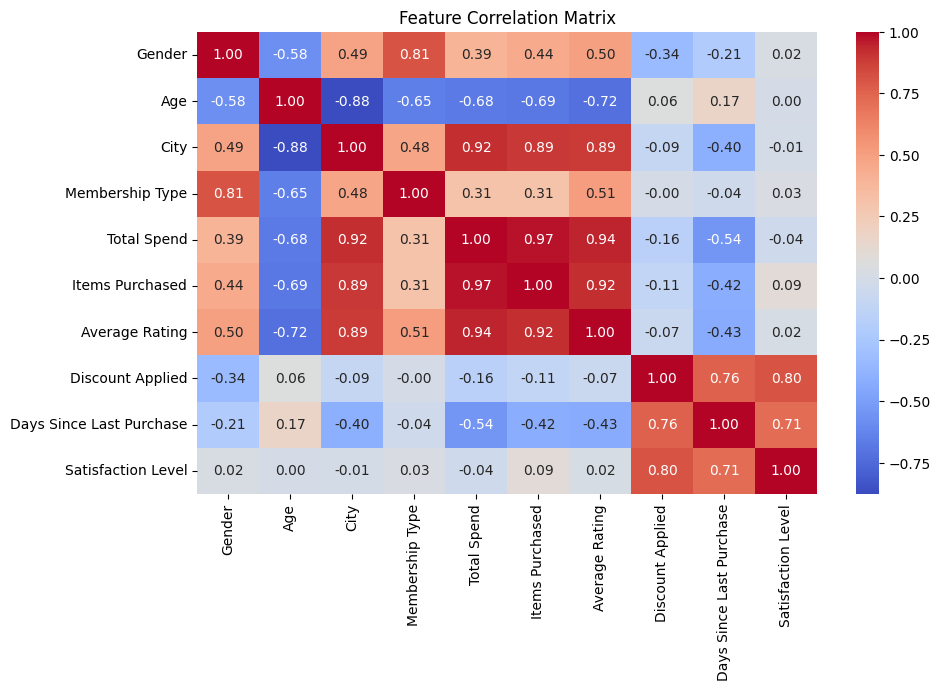

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

<ipython-input-28-7283363256d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="pastel", ax=axes[0])
<ipython-input-28-7283363256d9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Membership Type"], palette="pastel", ax=axes[1])
<ipython-input-28-7283363256d9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Satisfaction Level"], palette="pastel", ax=axes[2])


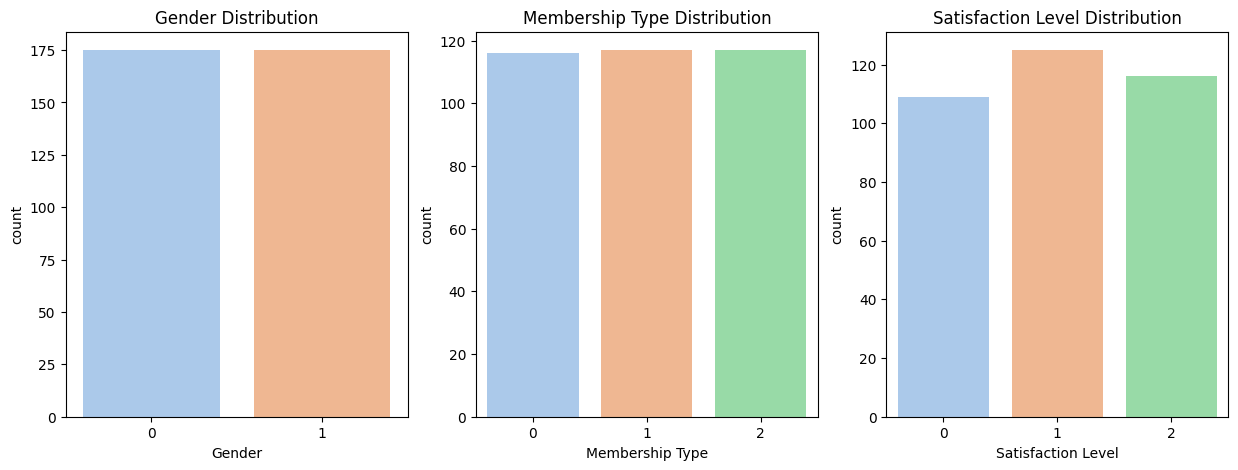

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=df["Gender"], palette="pastel", ax=axes[0])
axes[0].set_title("Gender Distribution")

sns.countplot(x=df["Membership Type"], palette="pastel", ax=axes[1])
axes[1].set_title("Membership Type Distribution")

sns.countplot(x=df["Satisfaction Level"], palette="pastel", ax=axes[2])
axes[2].set_title("Satisfaction Level Distribution")

plt.show()


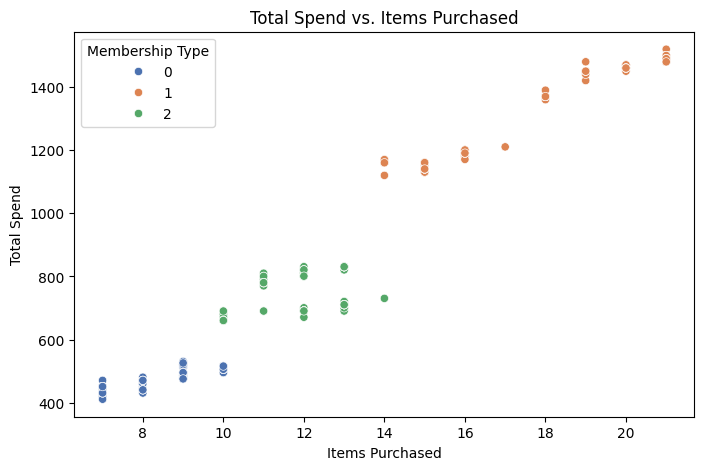

In [ ]:

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Items Purchased"], y=df["Total Spend"], hue=df["Membership Type"], palette="deep")
plt.title("Total Spend vs. Items Purchased")
plt.show()


<ipython-input-30-c9b620a11963>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Satisfaction Level"], y=df["Days Since Last Purchase"], palette="Set2")


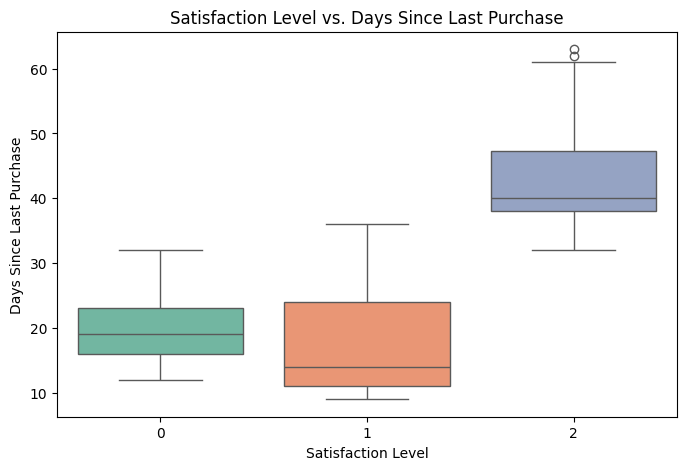

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Satisfaction Level"], y=df["Days Since Last Purchase"], palette="Set2")
plt.title("Satisfaction Level vs. Days Since Last Purchase")
plt.show()

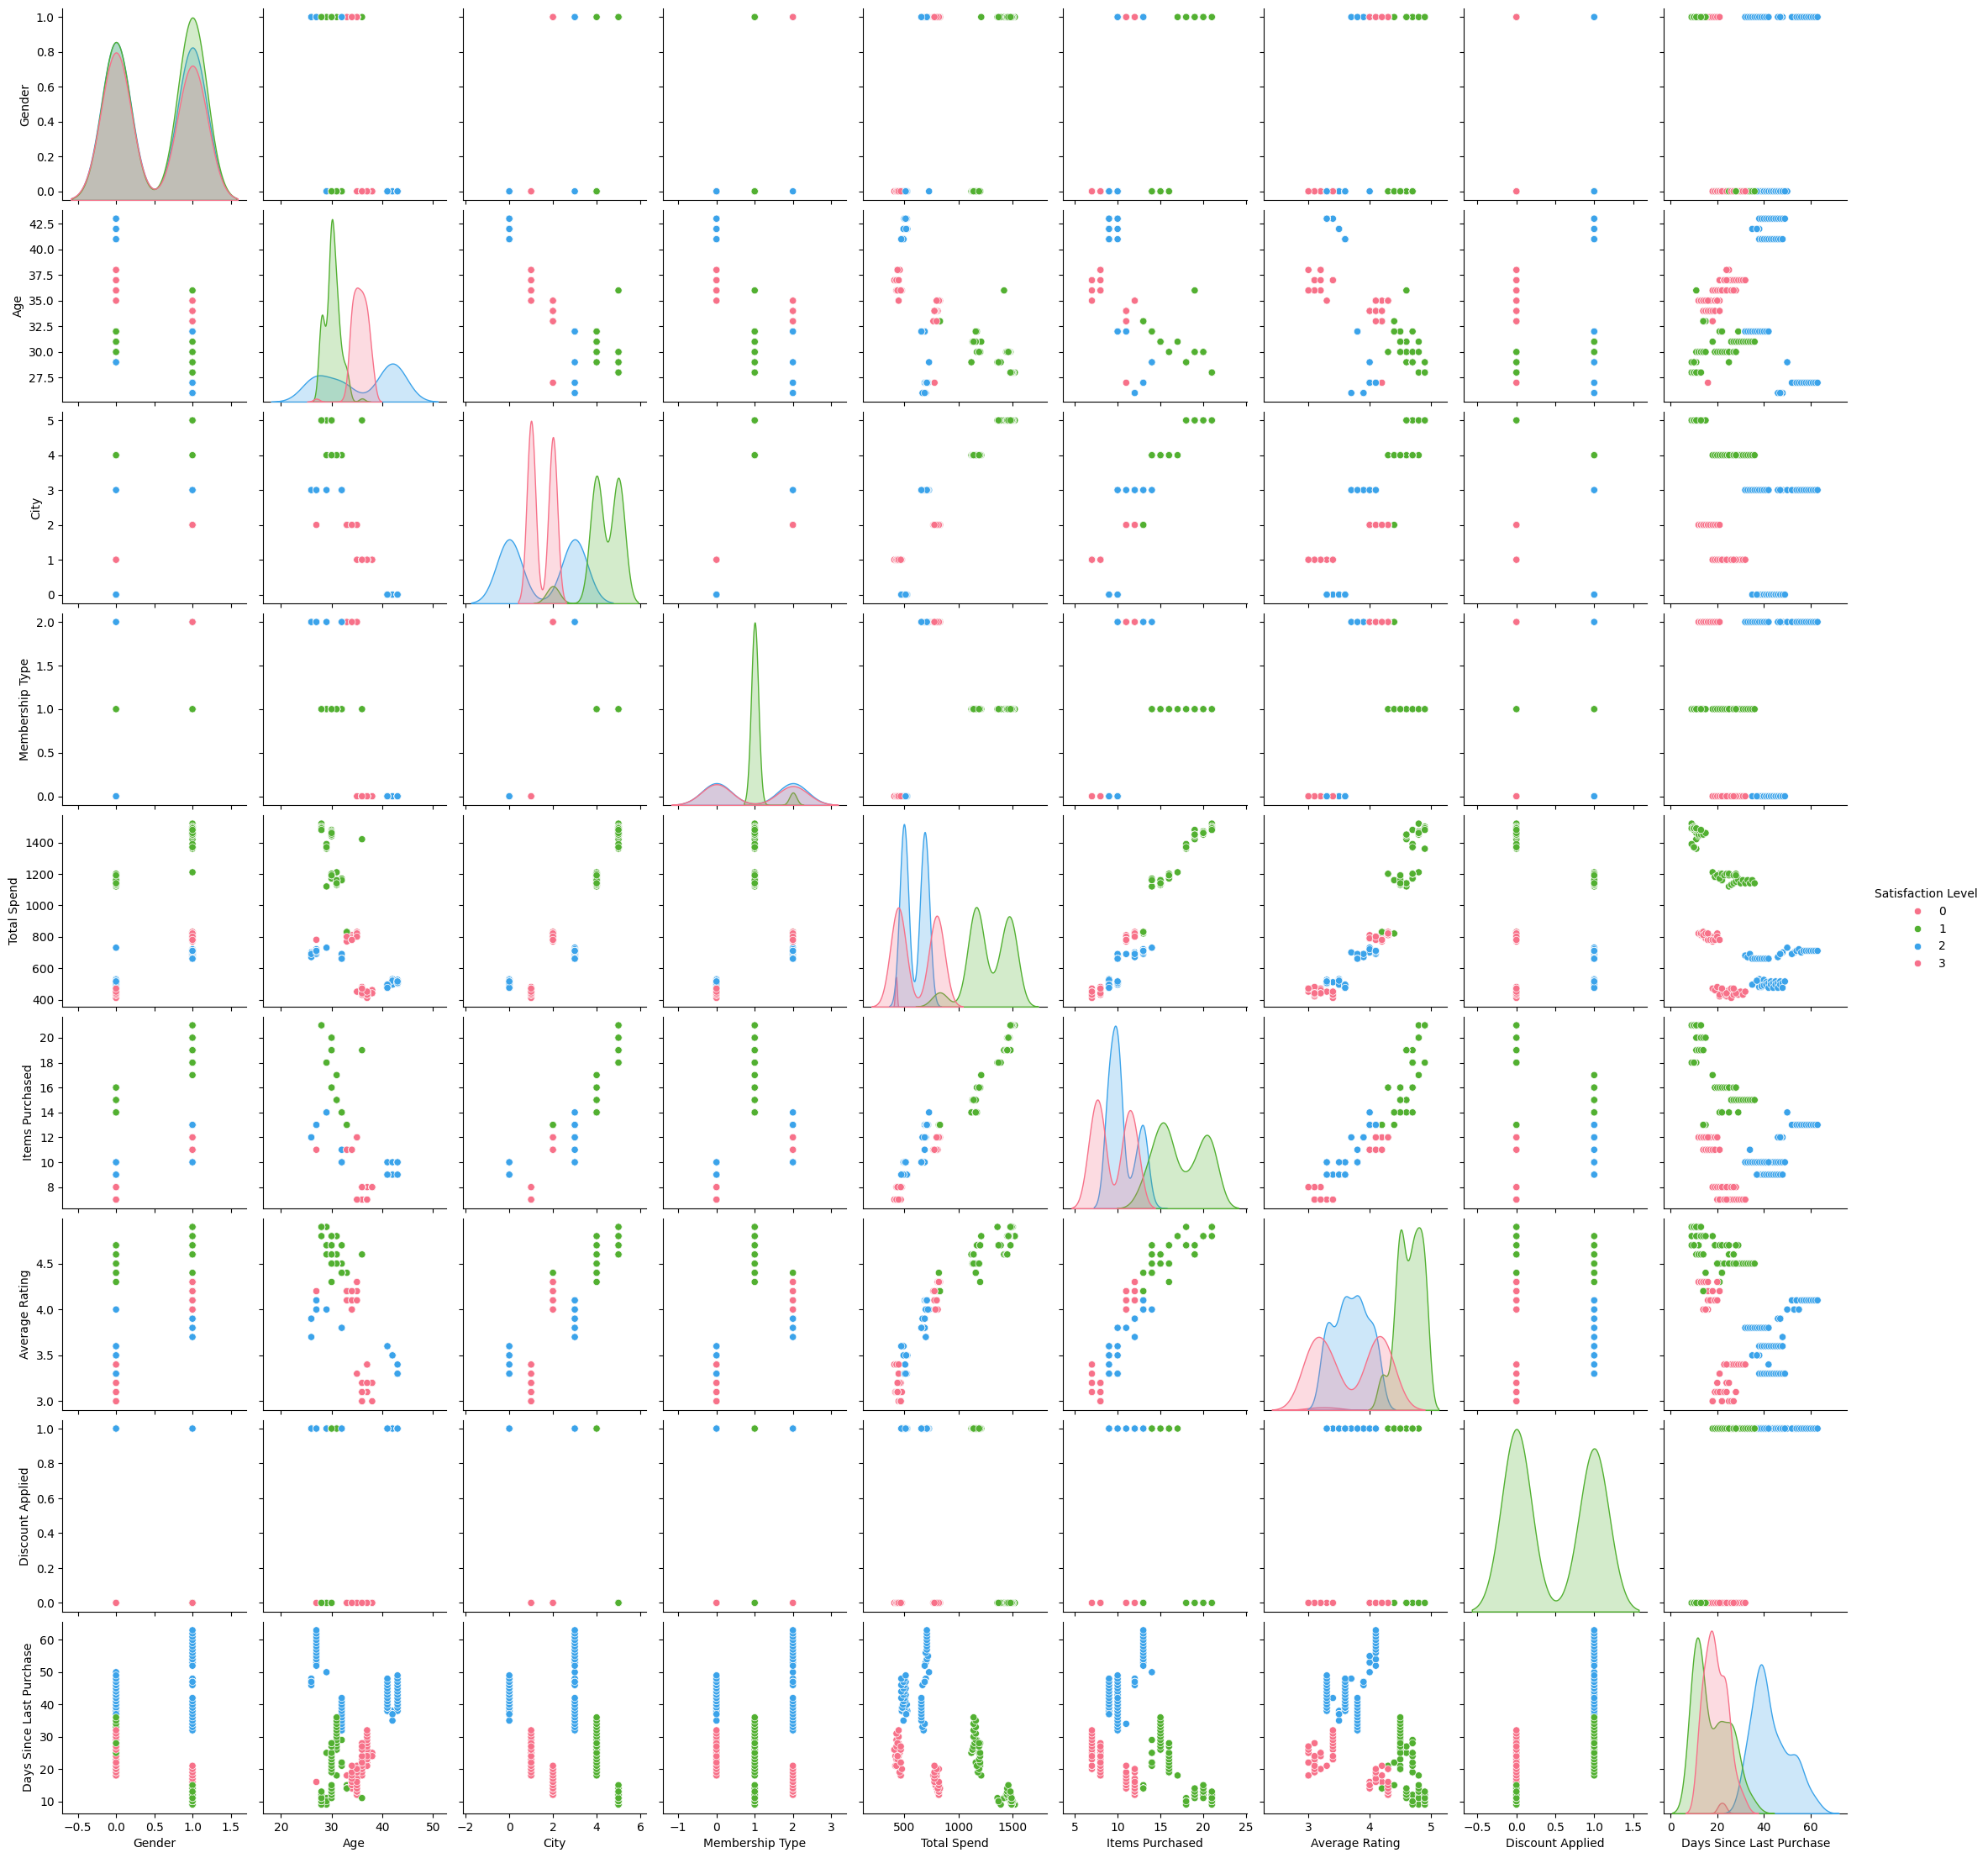

In [ ]:
sns.pairplot(df, hue="Satisfaction Level", palette="husl")
plt.show()

# Preprocessing

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder(categories=[['Unsatisfied', 'Neutral', 'Satisfied']])
df[['Satisfaction Level']] = ordinal_enc.fit_transform(df[['Satisfaction Level']])


In [8]:
label_encoders = {}
categorical_cols = ['Gender', 'City', 'Membership Type']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    joblib.dump(le, f'{col}_label_enc.joblib')

In [9]:
df.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,0,29,4,1,1120.20,14,4.6,True,25,2.0
1,1,34,2,2,780.50,11,4.1,False,18,1.0
2,0,43,0,0,510.75,9,3.4,True,42,0.0
3,1,30,5,1,1480.30,19,4.7,False,12,2.0
4,1,27,3,2,720.40,13,4.0,True,55,0.0


In [10]:
numerical_columns = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [11]:
df['Discount Applied'] = df['Discount Applied'].astype(int)


In [12]:
print(df['Satisfaction Level'].value_counts(normalize=True))


Satisfaction Level
2.0    0.362857
0.0    0.331429
1.0    0.305714
Name: proportion, dtype: float64


In [13]:

split_ratio = 0.8  # 80% training, 20% testing
split_index = int(len(df) * split_ratio)

# Shuffle dataset before splitting (optional, but recommended)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split manually
X = df.drop(columns=['Satisfaction Level'])
y = df['Satisfaction Level']

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]






#models


Naïve Bayes Train Accuracy: 0.9785714285714285
Naïve Bayes Test Accuracy: 0.9428571428571428
Naïve Bayes F1 Score: 0.9427334570191712
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.83      1.00      0.91        20
         2.0       1.00      0.83      0.90        23

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.95      0.94      0.94        70



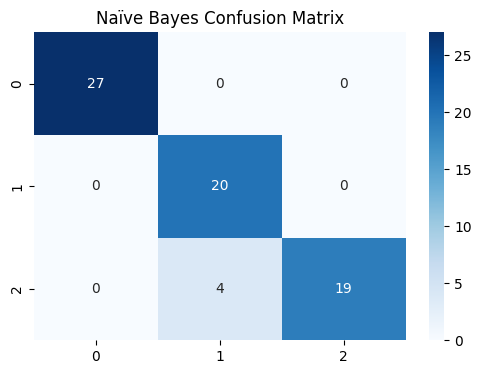

In [ ]:
# Naïve Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
y_pred_train_nb = nb_model.predict(X_train)

# Naïve Bayes Evaluation
print("Naïve Bayes Train Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix - Naïve Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

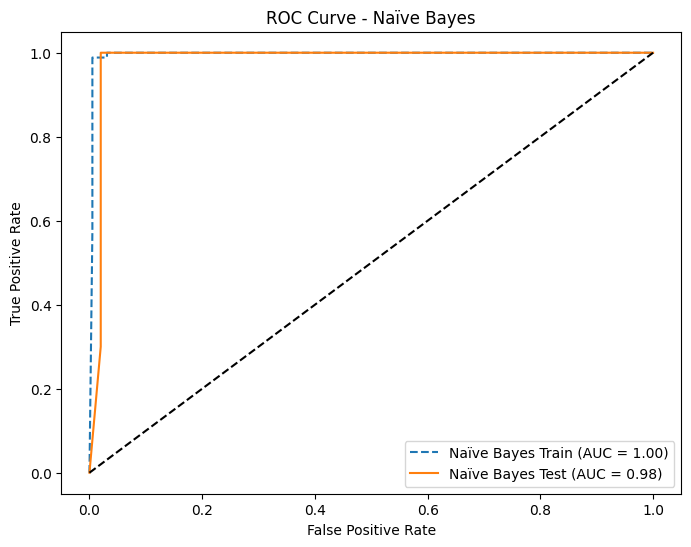

In [ ]:
# ROC Curve - Naïve Bayes
nb_probs_train = nb_model.predict_proba(X_train)
nb_probs_test = nb_model.predict_proba(X_test)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train_bin[:, 1], nb_probs_train[:, 1])
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test_bin[:, 1], nb_probs_test[:, 1])
auc_nb_train = auc(fpr_nb_train, tpr_nb_train)
auc_nb_test = auc(fpr_nb_test, tpr_nb_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_train, tpr_nb_train, label=f'Naïve Bayes Train (AUC = {auc_nb_train:.2f})', linestyle='--')
plt.plot(fpr_nb_test, tpr_nb_test, label=f'Naïve Bayes Test (AUC = {auc_nb_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

SVM Train Accuracy: 0.9785714285714285
SVM Test Accuracy: 0.9428571428571428
SVM F1 Score: 0.9427334570191712
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.83      1.00      0.91        20
         2.0       1.00      0.83      0.90        23

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.95      0.94      0.94        70



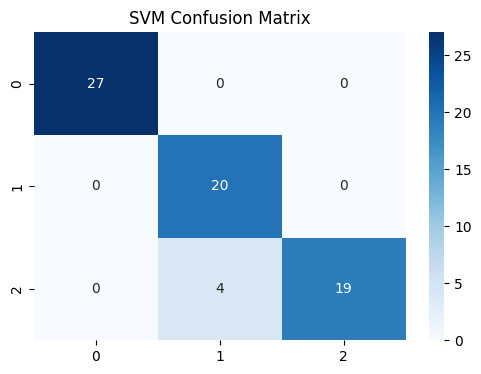

In [ ]:
# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# SVM Evaluation
print("SVM Train Accuracy:", accuracy_score(y_train, svm_model.predict(X_train)))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix - SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()

# ROC Curve - SVM
svm_probs_train = svm_model.predict_proba(X_train)
svm_probs_test = svm_model.predict_proba(X_test)

fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train_bin[:, 1], svm_probs_train[:, 1])
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_bin[:, 1], svm_probs_test[:, 1])
auc_svm_train = auc(fpr_svm_train, tpr_svm_train)
auc_svm_test = auc(fpr_svm_test, tpr_svm_test)


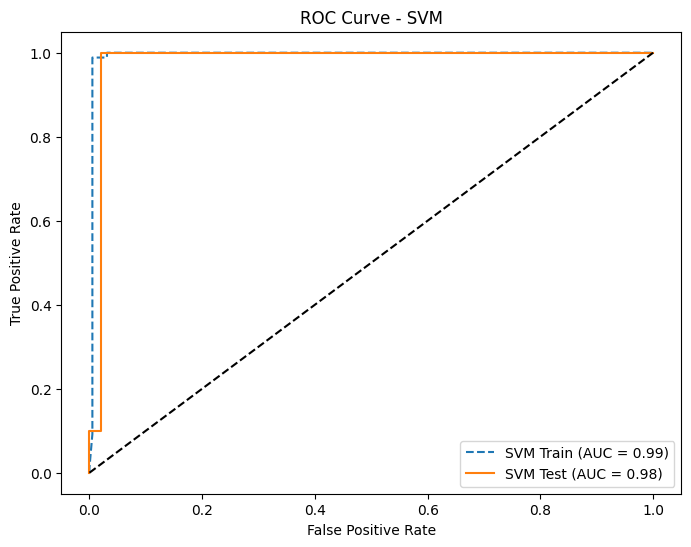

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_train, tpr_svm_train, label=f'SVM Train (AUC = {auc_svm_train:.2f})', linestyle='--')
plt.plot(fpr_svm_test, tpr_svm_test, label=f'SVM Test (AUC = {auc_svm_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()


Logistic Regression Train Accuracy: 0.9785714285714285
Logistic Regression Test Accuracy: 0.9428571428571428
Logistic Regression F1 Score: 0.9427334570191712
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        27
         1.0       0.83      1.00      0.91        20
         2.0       1.00      0.83      0.90        23

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.95      0.94      0.94        70



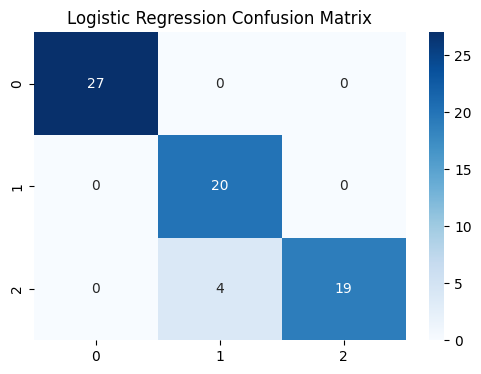

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# Logistic Regression Evaluation
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, log_model.predict(X_train)))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
# Confusion Matrix - Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


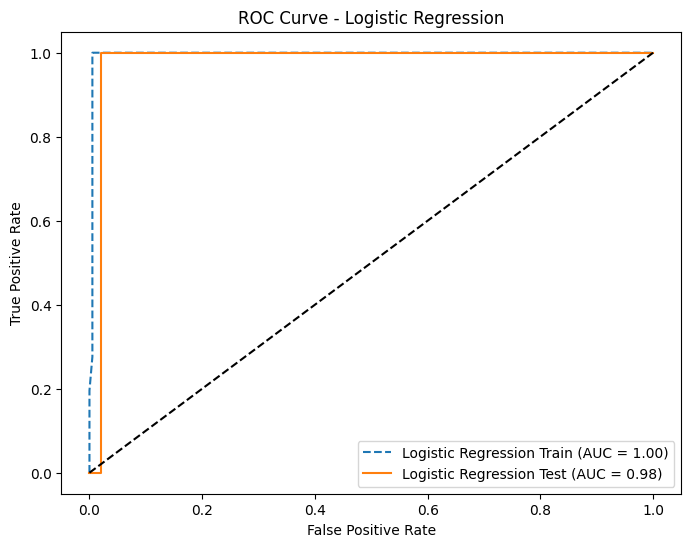

In [ ]:
# ROC Curve - Logistic Regression
log_probs_train = log_model.predict_proba(X_train)
log_probs_test = log_model.predict_proba(X_test)

y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

fpr_log_train, tpr_log_train, _ = roc_curve(y_train_bin[:, 1], log_probs_train[:, 1])
fpr_log_test, tpr_log_test, _ = roc_curve(y_test_bin[:, 1], log_probs_test[:, 1])
auc_log_train = auc(fpr_log_train, tpr_log_train)
auc_log_test = auc(fpr_log_test, tpr_log_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_train, tpr_log_train, label=f'Logistic Regression Train (AUC = {auc_log_train:.2f})', linestyle='--')
plt.plot(fpr_log_test, tpr_log_test, label=f'Logistic Regression Test (AUC = {auc_log_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


#end of ex1


#PCA - avoid

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

df_pca_2 = pd.DataFrame(data=df_pca, columns=["PC1", "PC2"])


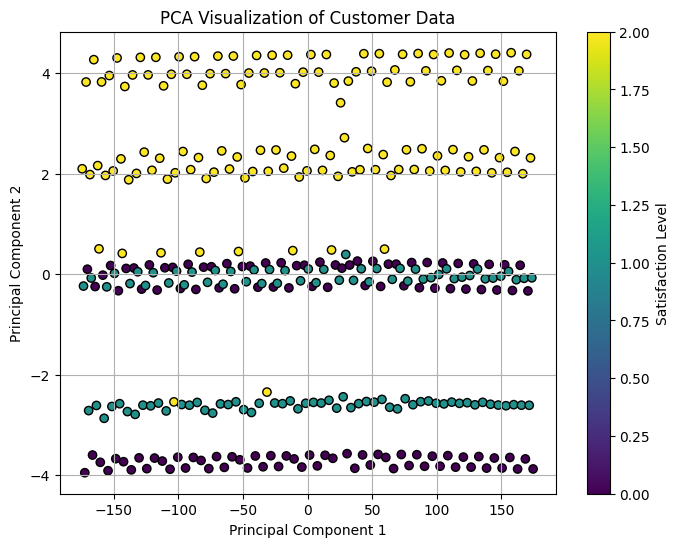

In [ ]:
color_mapping = df["Satisfaction Level"].to_numpy()


plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2["PC1"], df_pca_2["PC2"], c=color_mapping, cmap="viridis", edgecolors="k")
plt.colorbar(label="Satisfaction Level")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Customer Data")
plt.grid()
plt.show()

Explained Variance for Component 1: 0.9990456628854472
Explained Variance for Component 2: 0.9997366017348597
Explained Variance for Component 3: 0.9998694119021285
Explained Variance for Component 4: 0.9999353896291033
Explained Variance for Component 5: 0.9999686463895404
Explained Variance for Component 6: 0.9999852553319302
Explained Variance for Component 7: 0.9999936046472636
Explained Variance for Component 8: 0.9999965302354878
Explained Variance for Component 9: 0.9999989829714875
Explained Variance for Component 10: 0.9999996378577404
Explained Variance for Component 11: 1.0


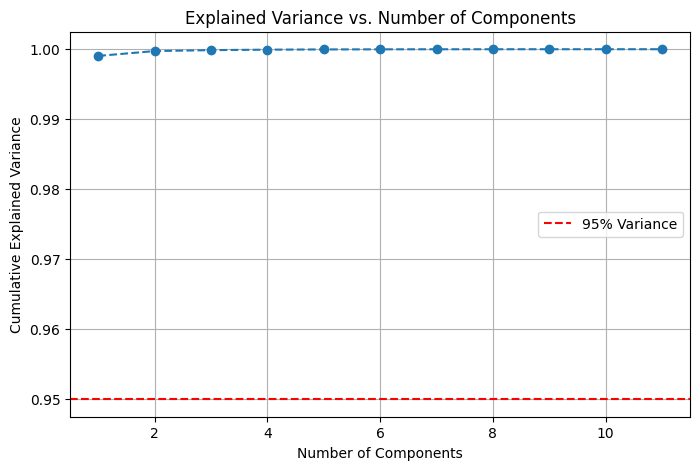

In [ ]:
pca = PCA()
pca.fit(df)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Explained Variance for Component {i+1}: {var}")

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Find the minimum number of components needed to explain 95% variance
optimal_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


Optimal number of components: 1


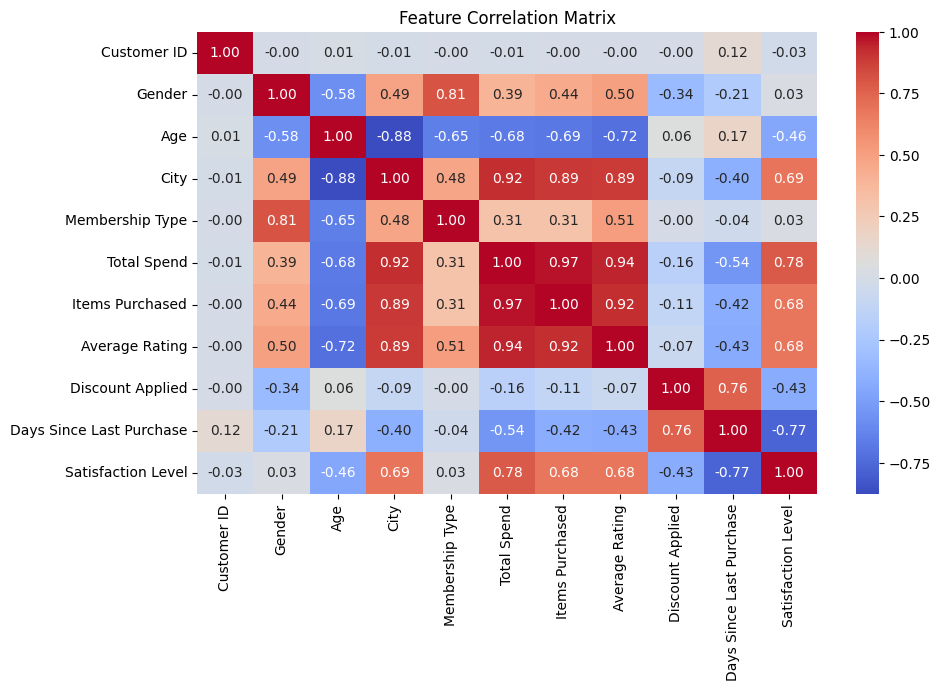

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


#Assignment 2

#lda

In [14]:
n_classes = len(np.unique(y))  # Unique class labels
max_lda_components = n_classes - 1
print("Max LDA Components:", max_lda_components)


Max LDA Components: 2


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [16]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)


LinearDiscriminantAnalysis()

In [17]:
explained_variance = np.cumsum(lda.explained_variance_ratio_)
print("Cumulative Explained Variance:", explained_variance)


Cumulative Explained Variance: [0.86406526 1.        ]


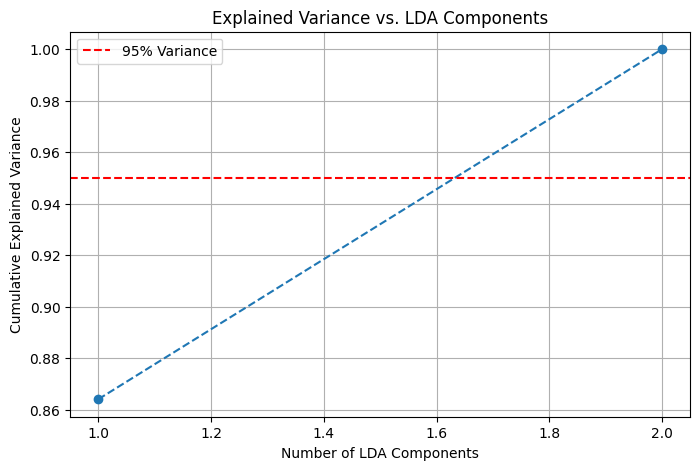

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker="o", linestyle="--")
plt.xlabel("Number of LDA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. LDA Components")
plt.axhline(y=0.95, color="r", linestyle="dashed", label="95% Variance")
plt.legend()
plt.grid()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier


In [20]:
for n in range(1, max_lda_components + 1):
    lda = LinearDiscriminantAnalysis(n_components=n)
    X_lda = lda.fit_transform(X, y)

    # Train classifier
    clf = RandomForestClassifier()
    score = cross_val_score(clf, X_lda, y, cv=5).mean()

    print(f"LDA Components: {n}, Accuracy: {score:.4f}")

LDA Components: 1, Accuracy: 0.9057
LDA Components: 2, Accuracy: 0.9886


In [21]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score


In [22]:

lda = LinearDiscriminantAnalysis(n_components=2)  # Choose optimal components
X_lda = lda.fit_transform(X, y)

#model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)


In [24]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function for Cross-Validation
def perform_cross_validation(model, X, y, model_name):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracies: {cv_scores}")
    print(f"{model_name} Mean CV Accuracy: {cv_scores.mean():.4f}\n")

In [25]:
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))


In [26]:
from sklearn.preprocessing import LabelBinarizer


#SVM

SVM Train Accuracy: 0.975
SVM Test Accuracy: 0.9285714285714286
SVM F1 Score: 0.9280331912984975
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.85      0.90        26

    accuracy                           0.93        70
   macro avg       0.93      0.94      0.93        70
weighted avg       0.93      0.93      0.93        70

SVM Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
SVM Mean CV Accuracy: 0.9750



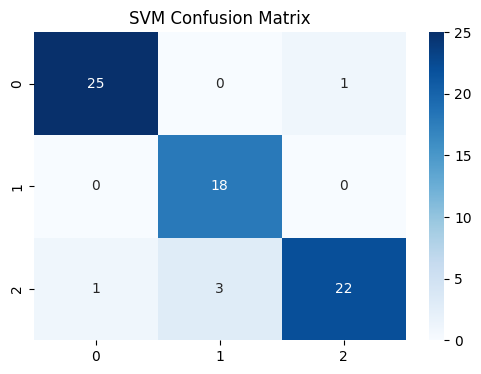

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_pred_train_svm = svm_model.predict(X_train)

print("SVM Train Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

perform_cross_validation(svm_model, X_train, y_train, "SVM")


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


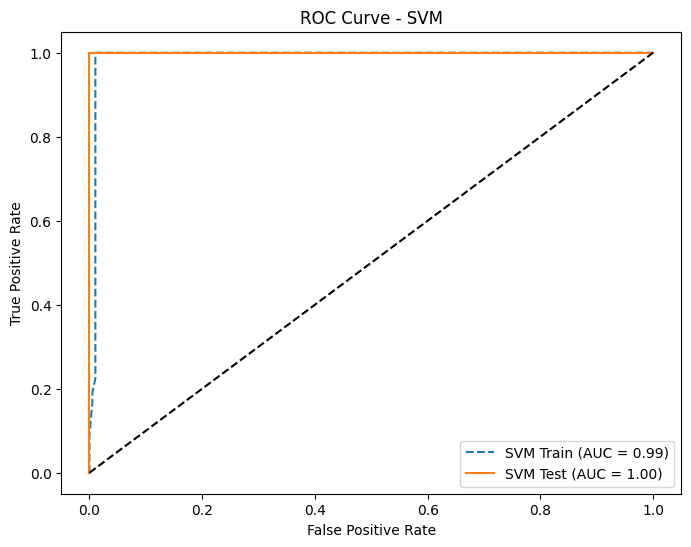

In [ ]:
svm_probs_train = svm_model.predict_proba(X_train)
svm_probs_test = svm_model.predict_proba(X_test)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train_bin[:, 1], svm_probs_train[:, 1])
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_bin[:, 1], svm_probs_test[:, 1])
auc_svm_train = auc(fpr_svm_train, tpr_svm_train)
auc_svm_test = auc(fpr_svm_test, tpr_svm_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_train, tpr_svm_train, label=f'SVM Train (AUC = {auc_svm_train:.2f})', linestyle='--')
plt.plot(fpr_svm_test, tpr_svm_test, label=f'SVM Test (AUC = {auc_svm_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

#Grid Search for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
svm = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
    'coef0': [0, 0.5, 1]
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate on Test Data
best_svm = grid_search.best_estimator_
print("Test Accuracy:", best_svm.score(X_test, y_test))

Best Hyperparameters: {'C': 0.1, 'coef0': 0.5, 'degree': 3, 'gamma': 10, 'kernel': 'poly'}
Best Score: 0.9928571428571429
Test Accuracy: 0.9714285714285714


Creating model with best parameters

In [ ]:
best_svm_hp = SVC(C=0.1, kernel='poly', degree=3, gamma=10, coef0=0.5, probability=True)
best_svm_hp.fit(X_train, y_train)



SVC(C=0.1, coef0=0.5, gamma=10, kernel='poly', probability=True)

SVM Train Accuracy: 0.9928571428571429
SVM Test Accuracy: 0.9714285714285714
SVM F1 Score: 0.9714285714285714
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       1.00      1.00      1.00        18
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

SVM Cross-Validation Accuracies: [0.98214286 1.         0.98214286 1.         1.        ]
SVM Mean CV Accuracy: 0.9929



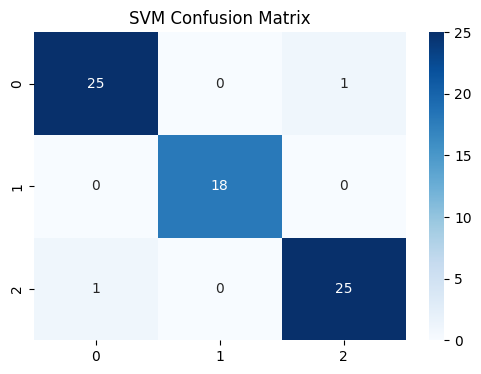

In [ ]:
y_pred_svm = best_svm_hp.predict(X_test)
y_pred_train_svm = best_svm_hp.predict(X_train)

print("SVM Train Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

perform_cross_validation(best_svm_hp, X_train, y_train, "SVM")


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


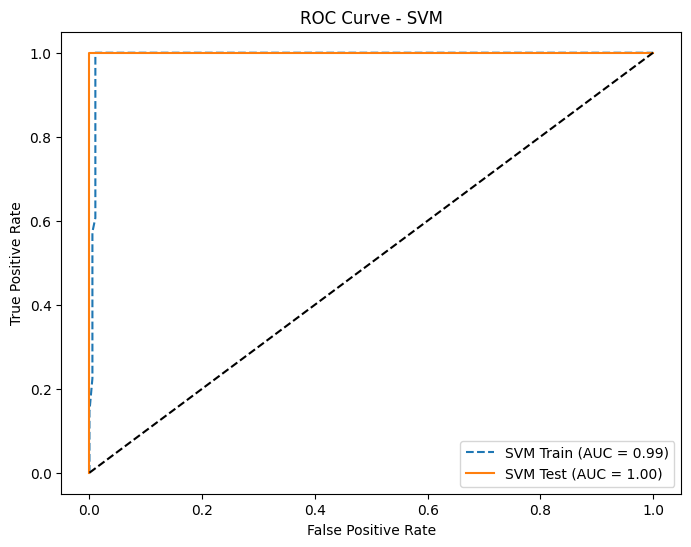

In [ ]:
svm_probs_train = best_svm_hp.predict_proba(X_train)
svm_probs_test = best_svm_hp.predict_proba(X_test)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train_bin[:, 1], svm_probs_train[:, 1])
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_bin[:, 1], svm_probs_test[:, 1])
auc_svm_train = auc(fpr_svm_train, tpr_svm_train)
auc_svm_test = auc(fpr_svm_test, tpr_svm_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_train, tpr_svm_train, label=f'SVM Train (AUC = {auc_svm_train:.2f})', linestyle='--')
plt.plot(fpr_svm_test, tpr_svm_test, label=f'SVM Test (AUC = {auc_svm_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

#RS for SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define hyperparameter distributions
param_dist = {
    'C': np.logspace(-2, 2, 10),  # Randomly sample from log scale
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'degree': np.arange(2, 5),
    'coef0': np.linspace(0, 1, 5)
}

# Perform Randomized Search
random_search = RandomizedSearchCV(svm, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on Test Data
best_svm_rs = random_search.best_estimator_
print("Test Accuracy:", best_svm_rs.score(X_test, y_test))


Best Hyperparameters: {'kernel': 'poly', 'gamma': 'auto', 'degree': np.int64(4), 'coef0': np.float64(0.5), 'C': np.float64(0.5994842503189409)}
Best Score: 0.9928571428571429
Test Accuracy: 0.9714285714285714


In [ ]:
best_svm_hp_rs = SVC(C=0.5994842503189409, kernel='poly', degree=4, gamma='auto', coef0=0.5, probability=True)
best_svm_hp_rs.fit(X_train, y_train)

SVC(C=0.5994842503189409, coef0=0.5, degree=4, gamma='auto', kernel='poly',
    probability=True)

SVM Train Accuracy: 0.9928571428571429
SVM Test Accuracy: 0.9714285714285714
SVM F1 Score: 0.9714285714285714
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       1.00      1.00      1.00        18
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

SVM Cross-Validation Accuracies: [0.98214286 1.         0.98214286 1.         1.        ]
SVM Mean CV Accuracy: 0.9929



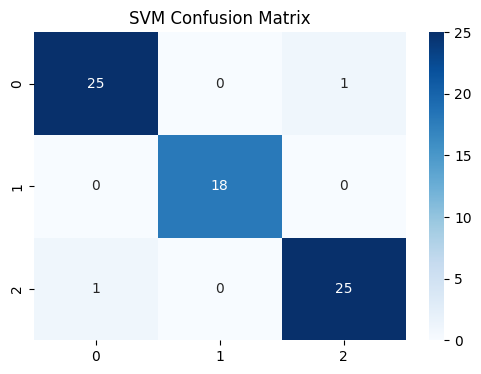

In [ ]:
y_pred_svm = best_svm_hp_rs.predict(X_test)
y_pred_train_svm = best_svm_hp_rs.predict(X_train)

print("SVM Train Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm, average='weighted'))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

perform_cross_validation(best_svm_hp_rs, X_train, y_train, "SVM")


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


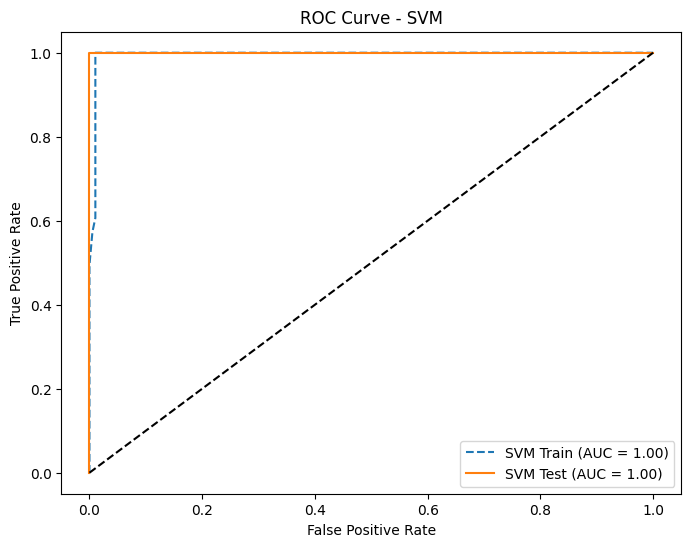

In [ ]:
svm_probs_train = best_svm_hp_rs.predict_proba(X_train)
svm_probs_test = best_svm_hp_rs.predict_proba(X_test)
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

fpr_svm_train, tpr_svm_train, _ = roc_curve(y_train_bin[:, 1], svm_probs_train[:, 1])
fpr_svm_test, tpr_svm_test, _ = roc_curve(y_test_bin[:, 1], svm_probs_test[:, 1])
auc_svm_train = auc(fpr_svm_train, tpr_svm_train)
auc_svm_test = auc(fpr_svm_test, tpr_svm_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_train, tpr_svm_train, label=f'SVM Train (AUC = {auc_svm_train:.2f})', linestyle='--')
plt.plot(fpr_svm_test, tpr_svm_test, label=f'SVM Test (AUC = {auc_svm_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()

#NB

Naïve Bayes Train Accuracy: 0.975
Naïve Bayes Test Accuracy: 0.9428571428571428
Naïve Bayes F1 Score: 0.9432225813402283
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.88      0.92        26

    accuracy                           0.94        70
   macro avg       0.94      0.95      0.94        70
weighted avg       0.95      0.94      0.94        70

Naïve Bayes Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
Naïve Bayes Mean CV Accuracy: 0.9750



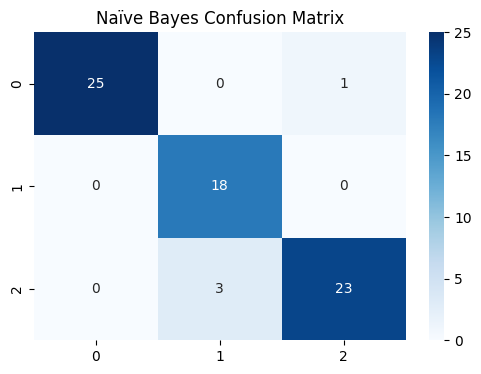

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_train_nb = nb_model.predict(X_train)

# Evaluation
print("Naïve Bayes Train Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

perform_cross_validation(nb_model, X_train, y_train, "Naïve Bayes")


# Confusion Matrix - Naïve Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

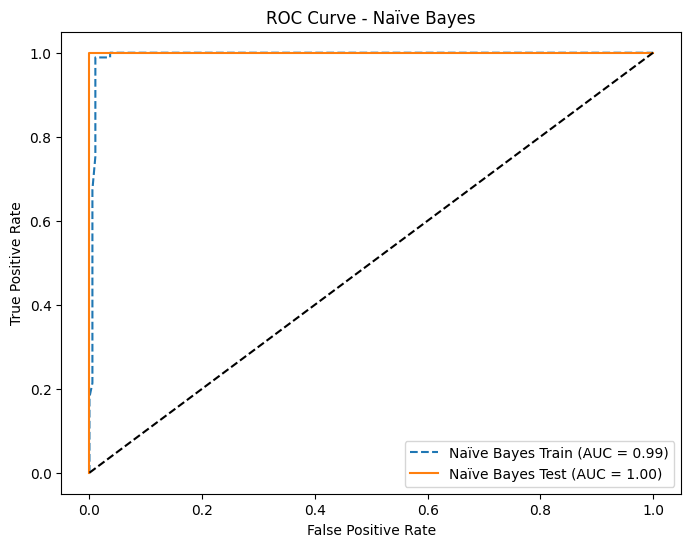

In [ ]:
nb_probs_train = nb_model.predict_proba(X_train)
nb_probs_test = nb_model.predict_proba(X_test)

fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train_bin[:, 1], nb_probs_train[:, 1])
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test_bin[:, 1], nb_probs_test[:, 1])
auc_nb_train = auc(fpr_nb_train, tpr_nb_train)
auc_nb_test = auc(fpr_nb_test, tpr_nb_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_train, tpr_nb_train, label=f'Naïve Bayes Train (AUC = {auc_nb_train:.2f})', linestyle='--')
plt.plot(fpr_nb_test, tpr_nb_test, label=f'Naïve Bayes Test (AUC = {auc_nb_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

#parameter tuning nb

Grid Search for Naïve Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]  # Smoothing values
}

# Perform Grid Search
nb = GaussianNB()
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

# Get the best parameters and model
best_params_nb = grid_search_nb.best_params_
best_nb = grid_search_nb.best_estimator_

print("Best Parameters for Naïve Bayes:", best_params_nb)

Best Parameters for Naïve Bayes: {'var_smoothing': 1e-09}


Naïve Bayes Train Accuracy: 0.975
Naïve Bayes Test Accuracy: 0.9428571428571428
Naïve Bayes F1 Score: 0.9432225813402283
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.88      0.92        26

    accuracy                           0.94        70
   macro avg       0.94      0.95      0.94        70
weighted avg       0.95      0.94      0.94        70

Naïve Bayes Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
Naïve Bayes Mean CV Accuracy: 0.9750



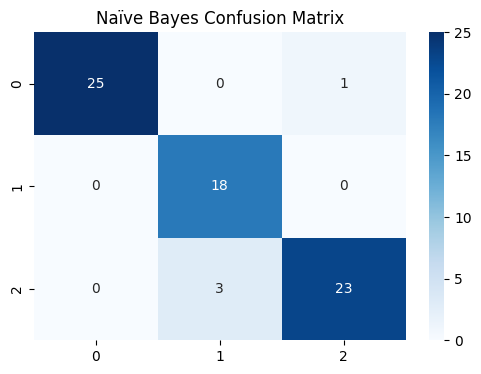

In [ ]:
best_params_nb_gs = GaussianNB(var_smoothing = 1e-9)

best_params_nb_gs.fit(X_train, y_train)

# Predictions
y_pred_nb = best_params_nb_gs.predict(X_test)
y_pred_train_nb = best_params_nb_gs.predict(X_train)

# Evaluation
print("Naïve Bayes Train Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

perform_cross_validation(best_params_nb_gs, X_train, y_train, "Naïve Bayes")


# Confusion Matrix - Naïve Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

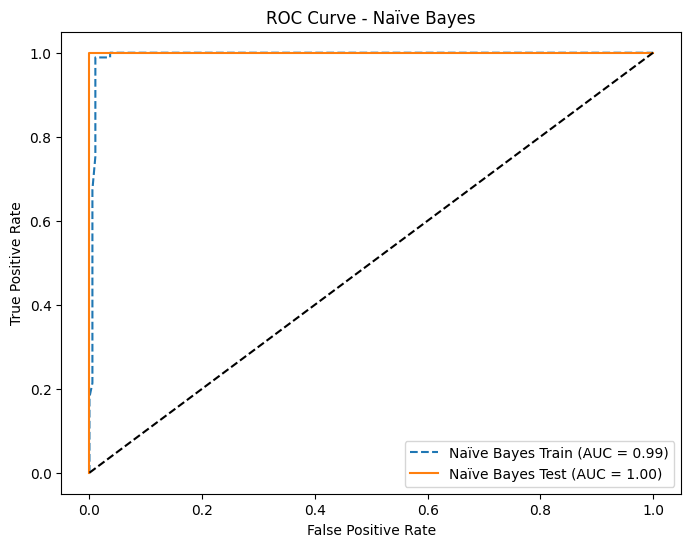

In [ ]:
nb_probs_train = best_params_nb_gs.predict_proba(X_train)
nb_probs_test = best_params_nb_gs.predict_proba(X_test)

fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train_bin[:, 1], nb_probs_train[:, 1])
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test_bin[:, 1], nb_probs_test[:, 1])
auc_nb_train = auc(fpr_nb_train, tpr_nb_train)
auc_nb_test = auc(fpr_nb_test, tpr_nb_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_train, tpr_nb_train, label=f'Naïve Bayes Train (AUC = {auc_nb_train:.2f})', linestyle='--')
plt.plot(fpr_nb_test, tpr_nb_test, label=f'Naïve Bayes Test (AUC = {auc_nb_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

Random Search for Naïve Bayes

In [ ]:
param_dist_nb = {
    'var_smoothing': np.logspace(-9, -4, 100)  # Random search over a wider range
}

# Perform Random Search
random_search_nb = RandomizedSearchCV(nb, param_distributions=param_dist_nb, n_iter=20,
                                      cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_nb.fit(X_train, y_train)

# Get the best parameters and model
best_params_nb_random = random_search_nb.best_params_
best_nb_random = random_search_nb.best_estimator_

print("Best Parameters for Naïve Bayes (Random Search):", best_params_nb_random)

Best Parameters for Naïve Bayes (Random Search): {'var_smoothing': np.float64(1.5556761439304724e-05)}


Naïve Bayes Train Accuracy: 0.975
Naïve Bayes Test Accuracy: 0.9428571428571428
Naïve Bayes F1 Score: 0.9432225813402283
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.88      0.92        26

    accuracy                           0.94        70
   macro avg       0.94      0.95      0.94        70
weighted avg       0.95      0.94      0.94        70

Naïve Bayes Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
Naïve Bayes Mean CV Accuracy: 0.9750



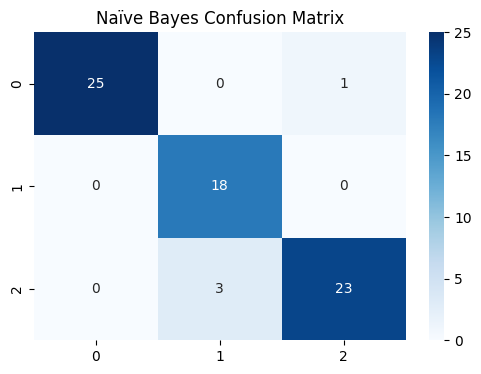

In [ ]:
best_params_nb_rs = GaussianNB(var_smoothing = 1.5556761439304724e-05)
best_params_nb_rs.fit(X_train, y_train)

# Predictions
y_pred_nb = best_params_nb_rs.predict(X_test)
y_pred_train_nb = best_params_nb_rs.predict(X_train)

# Evaluation
print("Naïve Bayes Train Accuracy:", accuracy_score(y_train, y_pred_train_nb))
print("Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naïve Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Naïve Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

perform_cross_validation(best_params_nb_rs, X_train, y_train, "Naïve Bayes")


# Confusion Matrix - Naïve Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title("Naïve Bayes Confusion Matrix")
plt.show()

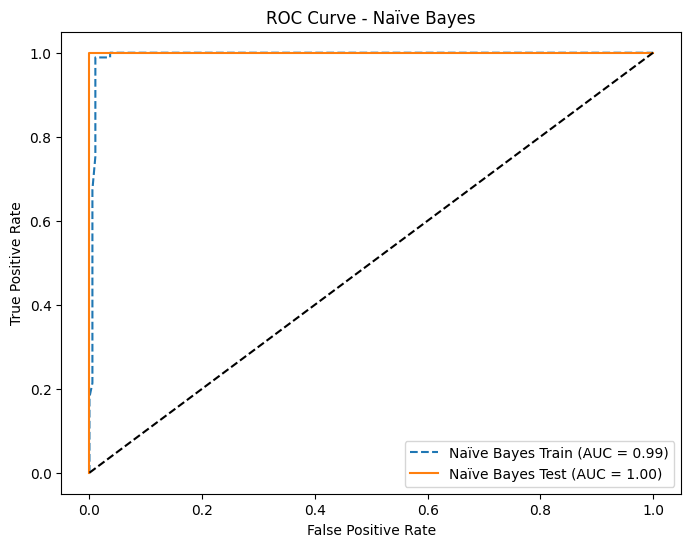

In [ ]:
nb_probs_train = best_params_nb_rs.predict_proba(X_train)
nb_probs_test = best_params_nb_rs.predict_proba(X_test)

fpr_nb_train, tpr_nb_train, _ = roc_curve(y_train_bin[:, 1], nb_probs_train[:, 1])
fpr_nb_test, tpr_nb_test, _ = roc_curve(y_test_bin[:, 1], nb_probs_test[:, 1])
auc_nb_train = auc(fpr_nb_train, tpr_nb_train)
auc_nb_test = auc(fpr_nb_test, tpr_nb_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb_train, tpr_nb_train, label=f'Naïve Bayes Train (AUC = {auc_nb_train:.2f})', linestyle='--')
plt.plot(fpr_nb_test, tpr_nb_test, label=f'Naïve Bayes Test (AUC = {auc_nb_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()

#log reg


Logistic Regression Train Accuracy: 0.975
Logistic Regression Test Accuracy: 0.9285714285714286
Logistic Regression F1 Score: 0.9280331912984975
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.85      0.90        26

    accuracy                           0.93        70
   macro avg       0.93      0.94      0.93        70
weighted avg       0.93      0.93      0.93        70

Logistic Regression Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
Logistic Regression Mean CV Accuracy: 0.9750



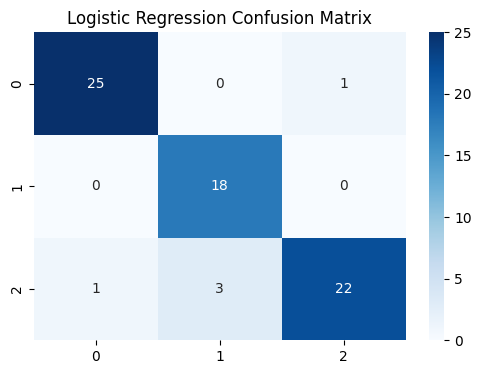

In [ ]:
log_reg_model = LogisticRegression( solver='liblinear')
log_reg_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg_model.predict(X_test)
y_pred_train_log = log_reg_model.predict(X_train)


# Evaluation
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

perform_cross_validation(log_reg_model, X_train, y_train, "Logistic Regression")


# Confusion Matrix - Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

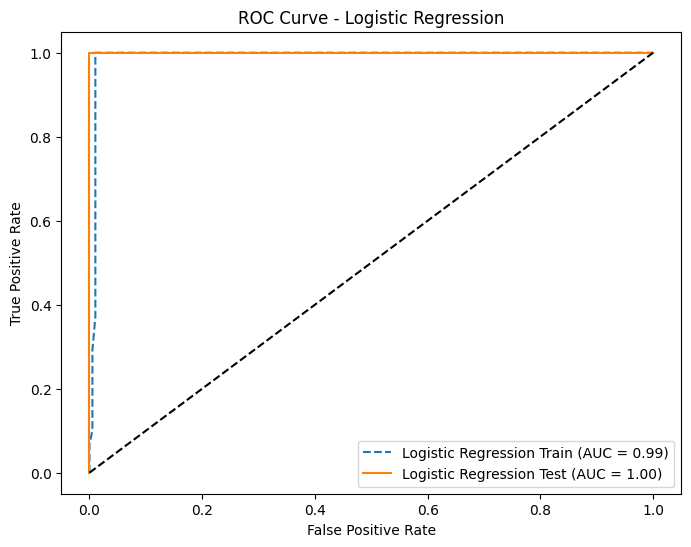

In [ ]:
log_probs_train = log_reg_model.predict_proba(X_train)
log_probs_test = log_reg_model.predict_proba(X_test)

fpr_log_train, tpr_log_train, _ = roc_curve(y_train_bin[:, 1], log_probs_train[:, 1])
fpr_log_test, tpr_log_test, _ = roc_curve(y_test_bin[:, 1], log_probs_test[:, 1])
auc_log_train = auc(fpr_log_train, tpr_log_train)
auc_log_test = auc(fpr_log_test, tpr_log_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_train, tpr_log_train, label=f'Logistic Regression Train (AUC = {auc_log_train:.2f})', linestyle='--')
plt.plot(fpr_log_test, tpr_log_test, label=f'Logistic Regression Test (AUC = {auc_log_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

#hyper parameter tuning log reg


In [ ]:
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'saga'], 'max_iter': [100, 200, 500]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 500]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.2, 0.5, 0.8], 'max_iter': [100, 200, 500]},
]

log_reg = LogisticRegression()

# Perform Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_log_reg = grid_search.best_estimator_

print("Best Hyperparameters (Grid Search):", best_params)
print("Best Train Accuracy:", accuracy_score(y_train, best_log_reg.predict(X_train)))
print("Best Test Accuracy:", accuracy_score(y_test, best_log_reg.predict(X_test)))

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best Hyperparameters (Grid Search): {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Train Accuracy: 0.975
Best Test Accuracy: 0.9285714285714286


Logistic Regression Train Accuracy: 0.975
Logistic Regression Test Accuracy: 0.9285714285714286
Logistic Regression F1 Score: 0.9280331912984975
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.85      0.90        26

    accuracy                           0.93        70
   macro avg       0.93      0.94      0.93        70
weighted avg       0.93      0.93      0.93        70

Logistic Regression Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
Logistic Regression Mean CV Accuracy: 0.9750



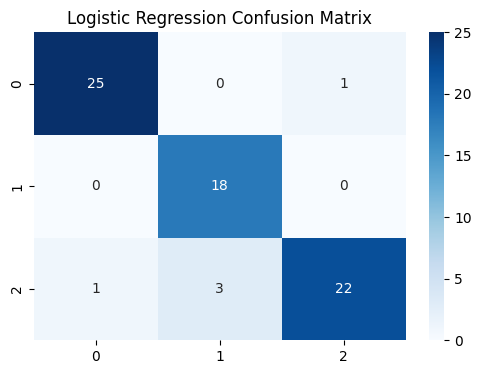

In [ ]:
best_log_reg_model_hy_gs = LogisticRegression(C = 0.01, max_iter= 100, penalty= 'l2', solver= 'lbfgs')
best_log_reg_model_hy_gs.fit(X_train, y_train)

# Predictions
y_pred_log = best_log_reg_model_hy_gs.predict(X_test)
y_pred_train_log = best_log_reg_model_hy_gs.predict(X_train)


# Evaluation
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

perform_cross_validation(best_log_reg_model_hy_gs, X_train, y_train, "Logistic Regression")


# Confusion Matrix - Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

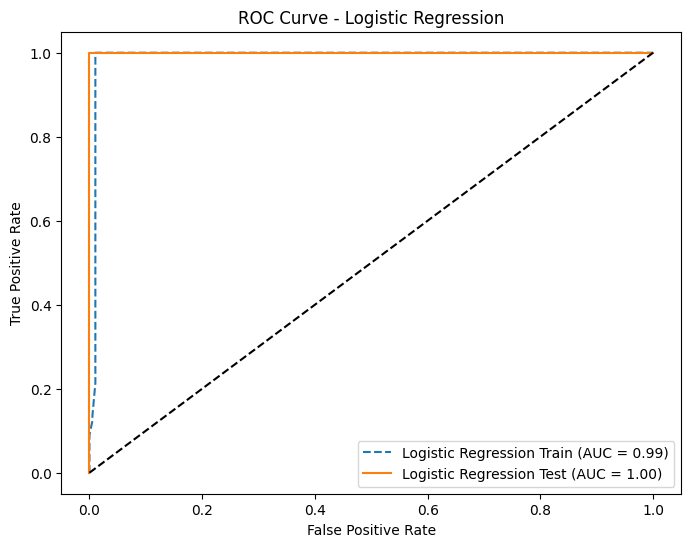

In [ ]:
log_probs_train = best_log_reg_model_hy_gs.predict_proba(X_train)
log_probs_test = best_log_reg_model_hy_gs.predict_proba(X_test)

fpr_log_train, tpr_log_train, _ = roc_curve(y_train_bin[:, 1], log_probs_train[:, 1])
fpr_log_test, tpr_log_test, _ = roc_curve(y_test_bin[:, 1], log_probs_test[:, 1])
auc_log_train = auc(fpr_log_train, tpr_log_train)
auc_log_test = auc(fpr_log_test, tpr_log_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_train, tpr_log_train, label=f'Logistic Regression Train (AUC = {auc_log_train:.2f})', linestyle='--')
plt.plot(fpr_log_test, tpr_log_test, label=f'Logistic Regression Test (AUC = {auc_log_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

#Randomized Search for log reg

In [ ]:
random_search = RandomizedSearchCV(log_reg, param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters and model
best_params_random = random_search.best_params_
best_log_reg_random = random_search.best_estimator_

print("Best Hyperparameters (Random Search):", best_params_random)
print("Best Train Accuracy:", accuracy_score(y_train, best_log_reg_random.predict(X_train)))
print("Best Test Accuracy:", accuracy_score(y_test, best_log_reg_random.predict(X_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters (Random Search): {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'C': 0.01}
Best Train Accuracy: 0.975
Best Test Accuracy: 0.9285714285714286


Logistic Regression Train Accuracy: 0.975
Logistic Regression Test Accuracy: 0.9285714285714286
Logistic Regression F1 Score: 0.9280331912984975
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       0.86      1.00      0.92        18
         2.0       0.96      0.85      0.90        26

    accuracy                           0.93        70
   macro avg       0.93      0.94      0.93        70
weighted avg       0.93      0.93      0.93        70

Logistic Regression Cross-Validation Accuracies: [0.96428571 1.         0.92857143 1.         0.98214286]
Logistic Regression Mean CV Accuracy: 0.9750



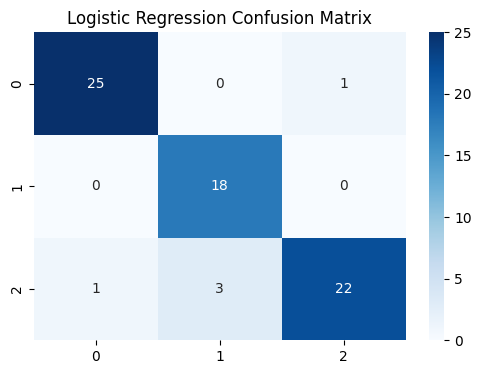

In [ ]:
best_log_reg_model_hy_rs = LogisticRegression(C = 0.01, max_iter= 100, penalty= 'l1', solver= 'liblinear')
best_log_reg_model_hy_rs.fit(X_train, y_train)

# Predictions
y_pred_log = best_log_reg_model_hy_rs.predict(X_test)
y_pred_train_log = best_log_reg_model_hy_rs.predict(X_train)


# Evaluation
print("Logistic Regression Train Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))

perform_cross_validation(best_log_reg_model_hy_rs, X_train, y_train, "Logistic Regression")


# Confusion Matrix - Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

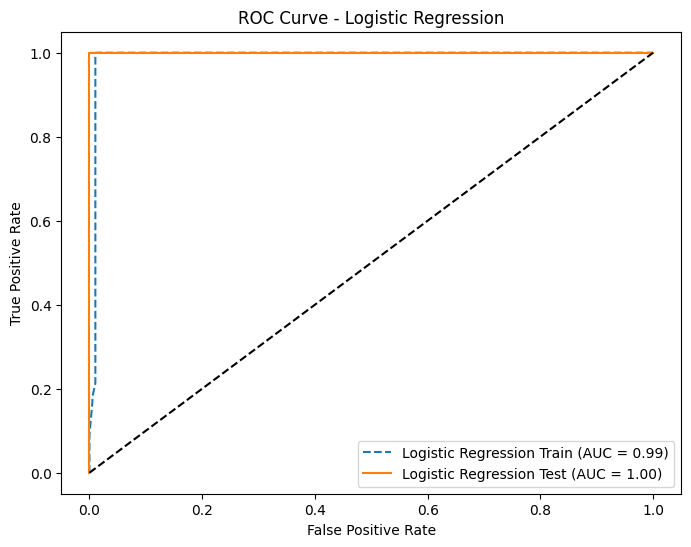

In [ ]:
log_probs_train = best_log_reg_model_hy_rs.predict_proba(X_train)
log_probs_test = best_log_reg_model_hy_rs.predict_proba(X_test)

fpr_log_train, tpr_log_train, _ = roc_curve(y_train_bin[:, 1], log_probs_train[:, 1])
fpr_log_test, tpr_log_test, _ = roc_curve(y_test_bin[:, 1], log_probs_test[:, 1])
auc_log_train = auc(fpr_log_train, tpr_log_train)
auc_log_test = auc(fpr_log_test, tpr_log_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_train, tpr_log_train, label=f'Logistic Regression Train (AUC = {auc_log_train:.2f})', linestyle='--')
plt.plot(fpr_log_test, tpr_log_test, label=f'Logistic Regression Test (AUC = {auc_log_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

#RF

In [ ]:
# Random Forest Model with LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
rf_lda_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lda_model.fit(X_train, y_train)

# Predict on train and test data
rf_lda_train_predictions = rf_lda_model.predict(X_train)
rf_lda_test_predictions = rf_lda_model.predict(X_test)

# Evaluate the model
rf_lda_train_accuracy = accuracy_score(y_train, rf_lda_train_predictions)
rf_lda_test_accuracy = accuracy_score(y_test, rf_lda_test_predictions)

rf_lda_confusion_matrix = confusion_matrix(y_test, rf_lda_test_predictions)
rf_lda_classification_report = classification_report(y_test, rf_lda_test_predictions)

print(f'Random Forest with LDA Train Accuracy: {rf_lda_train_accuracy:.4f}')
print(f'Random Forest with LDA Test Accuracy: {rf_lda_test_accuracy:.4f}')
print('\nConfusion Matrix:\n', rf_lda_confusion_matrix)
print('\nClassification Report:\n', rf_lda_classification_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_lda_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Predict probabilities for ROC curve
rf_probs_train = rf_lda_model.predict_proba(X_train)[:, 1]
rf_probs_test = rf_lda_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train_bin[:, 1], rf_probs_train)
fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test_bin[:, 1], rf_probs_test)
auc_rf_train = auc(fpr_rf_train, tpr_rf_train)
auc_rf_test = auc(fpr_rf_test, tpr_rf_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_train, tpr_rf_train, label=f'Random Forest Train (AUC = {auc_rf_train:.2f})', linestyle='--')
plt.plot(fpr_rf_test, tpr_rf_test, label=f'Random Forest Test (AUC = {auc_rf_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with LDA")
plt.legend()
plt.show()


#RF Hyper parameter

random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter grid for Random Search
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create and fit RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters (Random Search): {random_search.best_params_}')
print(f'Best Score (Random Search): {random_search.best_score_:.4f}')

# Predict on test data
rf_random_test_predictions = random_search.best_estimator_.predict(X_test)
random_test_accuracy = accuracy_score(y_test, rf_random_test_predictions)
print(f'Test Accuracy (Random Search): {random_test_accuracy:.4f}')


In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
rf_random_probs_train = random_search.best_estimator_.predict_proba(X_train)[:, 1]
rf_random_probs_test = random_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_random_train, tpr_random_train, _ = roc_curve(y_train_bin[:, 1], rf_random_probs_train)
fpr_random_test, tpr_random_test, _ = roc_curve(y_test_bin[:, 1], rf_random_probs_test)
auc_random_train = auc(fpr_random_train, tpr_random_train)
auc_random_test = auc(fpr_random_test, tpr_random_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_random_train, tpr_random_train, label=f'Random Forest (Random Search) Train (AUC = {auc_random_train:.2f})', linestyle='--')
plt.plot(fpr_random_test, tpr_random_test, label=f'Random Forest (Random Search) Test (AUC = {auc_random_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Random Search)")
plt.legend()
plt.show()


Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Create and fit GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters (Grid Search): {grid_search.best_params_}')
print(f'Best Score (Grid Search): {grid_search.best_score_:.4f}')

# Predict on test data
rf_grid_test_predictions = grid_search.best_estimator_.predict(X_test)
grid_test_accuracy = accuracy_score(y_test, rf_grid_test_predictions)
print(f'Test Accuracy (Grid Search): {grid_test_accuracy:.4f}')


In [ ]:
# Predict probabilities for ROC curve
rf_grid_probs_train = grid_search.best_estimator_.predict_proba(X_train)[:, 1]
rf_grid_probs_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_grid_train, tpr_grid_train, _ = roc_curve(y_train_bin[:, 1], rf_grid_probs_train)
fpr_grid_test, tpr_grid_test, _ = roc_curve(y_test_bin[:, 1], rf_grid_probs_test)
auc_grid_train = auc(fpr_grid_train, tpr_grid_train)
auc_grid_test = auc(fpr_grid_test, tpr_grid_test)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_grid_train, tpr_grid_train, label=f'Random Forest (Grid Search) Train (AUC = {auc_grid_train:.2f})', linestyle='--')
plt.plot(fpr_grid_test, tpr_grid_test, label=f'Random Forest (Grid Search) Test (AUC = {auc_grid_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest (Grid Search)")
plt.legend()
plt.show()


# Mini Project
## - Ensemble approaches

In [27]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

Bagging Train Accuracy: 0.9928571428571429
Bagging Test Accuracy: 0.9714285714285714
Bagging F1 Score: 0.9714285714285714
Bagging Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       1.00      1.00      1.00        18
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

Bagging Cross-Validation Accuracies: [0.98214286 1.         0.98214286 1.         1.        ]
Bagging Mean CV Accuracy: 0.9929



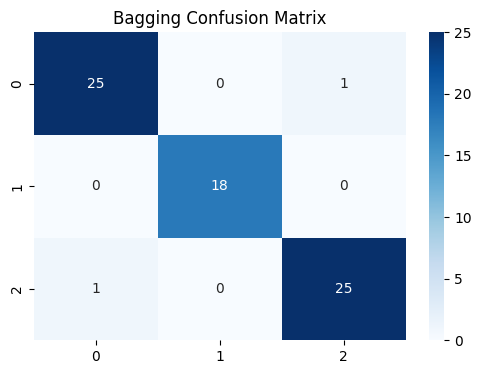

In [28]:
# Train Bagging Classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

# Predictions
y_pred_train_bagging = bagging.predict(X_train)
y_pred_bagging = bagging.predict(X_test)

# Evaluation
print("Bagging Train Accuracy:", accuracy_score(y_train, y_pred_train_bagging))
print("Bagging Test Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("Bagging F1 Score:", f1_score(y_test, y_pred_bagging, average='weighted'))
print("Bagging Classification Report:\n", classification_report(y_test, y_pred_bagging))

perform_cross_validation(bagging, X_train, y_train, "Bagging")

# Confusion Matrix - Bagging
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.title("Bagging Confusion Matrix")
plt.show()



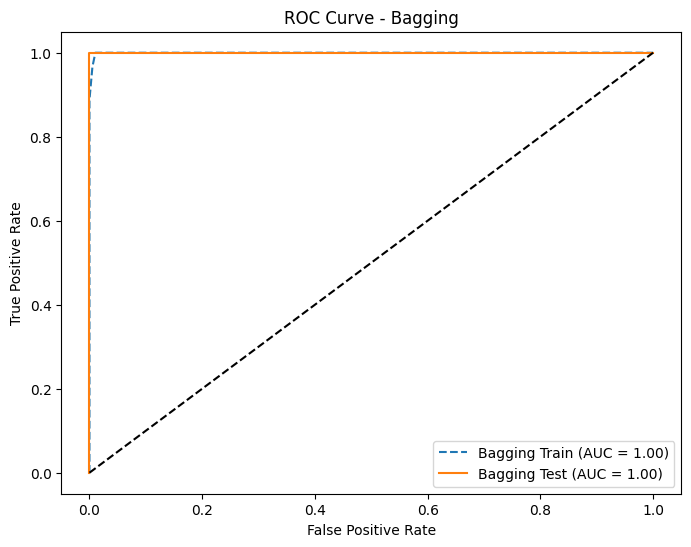

In [ ]:
# ROC Curve - Bagging
bagging_probs_train = bagging.predict_proba(X_train)
bagging_probs_test = bagging.predict_proba(X_test)

fpr_bagging_train, tpr_bagging_train, _ = roc_curve(y_train_bin[:, 1], bagging_probs_train[:, 1])
fpr_bagging_test, tpr_bagging_test, _ = roc_curve(y_test_bin[:, 1], bagging_probs_test[:, 1])
auc_bagging_train = auc(fpr_bagging_train, tpr_bagging_train)
auc_bagging_test = auc(fpr_bagging_test, tpr_bagging_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_bagging_train, tpr_bagging_train, label=f'Bagging Train (AUC = {auc_bagging_train:.2f})', linestyle='--')
plt.plot(fpr_bagging_test, tpr_bagging_test, label=f'Bagging Test (AUC = {auc_bagging_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Bagging")
plt.legend()
plt.show()


AdaBoost Train Accuracy: 0.9928571428571429
AdaBoost Test Accuracy: 0.9714285714285714
AdaBoost F1 Score: 0.9714285714285714
AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       1.00      1.00      1.00        18
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

AdaBoost Cross-Validation Accuracies: [0.98214286 1.         0.96428571 1.         1.        ]
AdaBoost Mean CV Accuracy: 0.9893



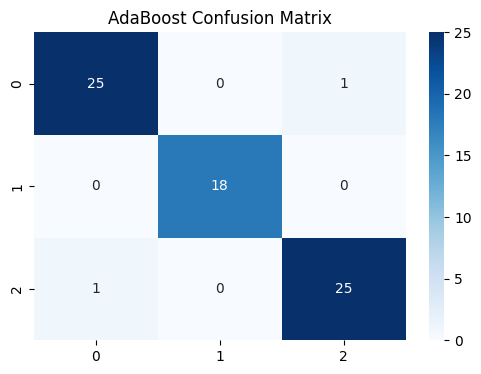

In [ ]:
# Train AdaBoost Classifier
adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Predictions
y_pred_train_adaboost = adaboost.predict(X_train)
y_pred_adaboost = adaboost.predict(X_test)

# Evaluation
print("AdaBoost Train Accuracy:", accuracy_score(y_train, y_pred_train_adaboost))
print("AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print("AdaBoost F1 Score:", f1_score(y_test, y_pred_adaboost, average='weighted'))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))

perform_cross_validation(adaboost, X_train, y_train, "AdaBoost")

# Confusion Matrix - AdaBoost
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap='Blues')
plt.title("AdaBoost Confusion Matrix")
plt.show()


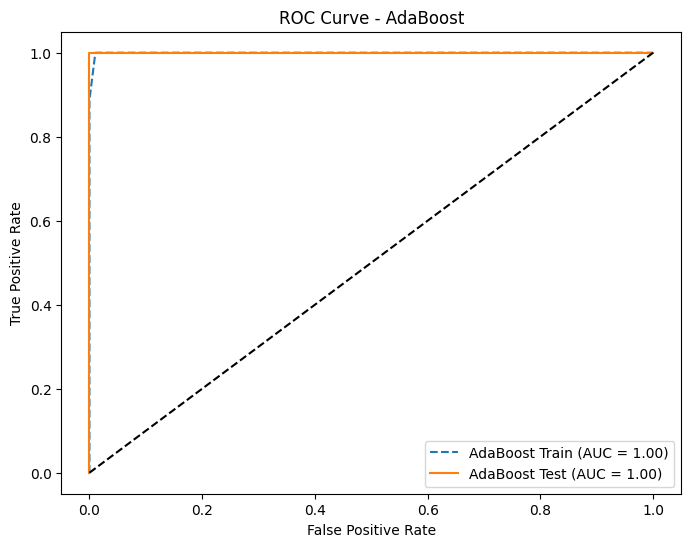

In [ ]:
# ROC Curve - AdaBoost
adaboost_probs_train = adaboost.predict_proba(X_train)
adaboost_probs_test = adaboost.predict_proba(X_test)

fpr_adaboost_train, tpr_adaboost_train, _ = roc_curve(y_train_bin[:, 1], adaboost_probs_train[:, 1])
fpr_adaboost_test, tpr_adaboost_test, _ = roc_curve(y_test_bin[:, 1], adaboost_probs_test[:, 1])
auc_adaboost_train = auc(fpr_adaboost_train, tpr_adaboost_train)
auc_adaboost_test = auc(fpr_adaboost_test, tpr_adaboost_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost_train, tpr_adaboost_train, label=f'AdaBoost Train (AUC = {auc_adaboost_train:.2f})', linestyle='--')
plt.plot(fpr_adaboost_test, tpr_adaboost_test, label=f'AdaBoost Test (AUC = {auc_adaboost_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend()
plt.show()

Gradient Boosting Train Accuracy: 0.9928571428571429
Gradient Boosting Test Accuracy: 0.9714285714285714
Gradient Boosting F1 Score: 0.9714285714285714
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        26
         1.0       1.00      1.00      1.00        18
         2.0       0.96      0.96      0.96        26

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70

Gradient Boosting Cross-Validation Accuracies: [0.98214286 1.         0.98214286 1.         1.        ]
Gradient Boosting Mean CV Accuracy: 0.9929



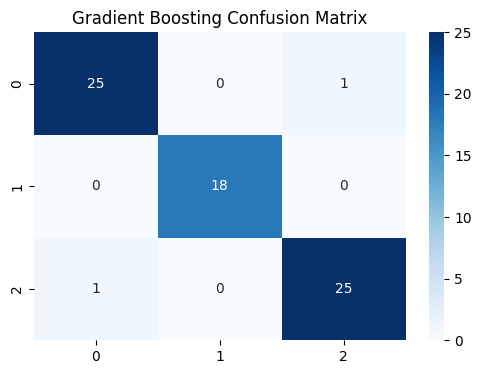

In [ ]:
# Train Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(n_estimators=50, random_state=42)
gradient_boost.fit(X_train, y_train)

# Predictions
y_pred_train_gradient = gradient_boost.predict(X_train)
y_pred_gradient = gradient_boost.predict(X_test)

# Evaluation
print("Gradient Boosting Train Accuracy:", accuracy_score(y_train, y_pred_train_gradient))
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gradient))
print("Gradient Boosting F1 Score:", f1_score(y_test, y_pred_gradient, average='weighted'))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gradient))

perform_cross_validation(gradient_boost, X_train, y_train, "Gradient Boosting")

# Confusion Matrix - Gradient Boosting
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_gradient), annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

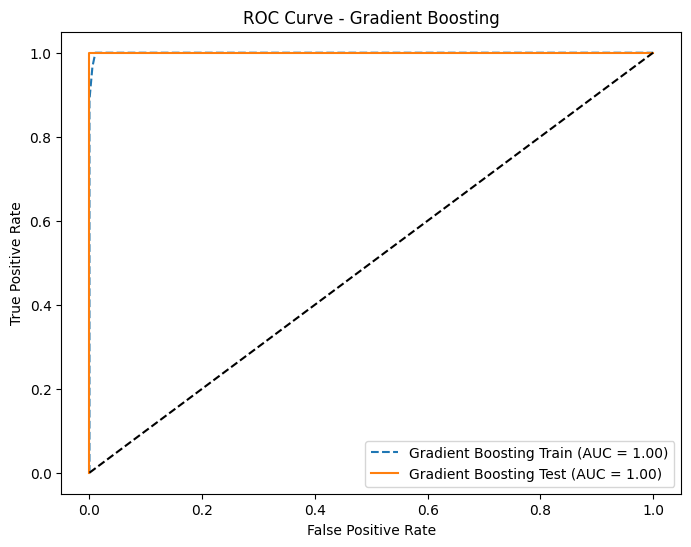

In [ ]:
# ROC Curve - Gradient Boosting
gradient_probs_train = gradient_boost.predict_proba(X_train)
gradient_probs_test = gradient_boost.predict_proba(X_test)

fpr_gradient_train, tpr_gradient_train, _ = roc_curve(y_train_bin[:, 1], gradient_probs_train[:, 1])
fpr_gradient_test, tpr_gradient_test, _ = roc_curve(y_test_bin[:, 1], gradient_probs_test[:, 1])
auc_gradient_train = auc(fpr_gradient_train, tpr_gradient_train)
auc_gradient_test = auc(fpr_gradient_test, tpr_gradient_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gradient_train, tpr_gradient_train, label=f'Gradient Boosting Train (AUC = {auc_gradient_train:.2f})', linestyle='--')
plt.plot(fpr_gradient_test, tpr_gradient_test, label=f'Gradient Boosting Test (AUC = {auc_gradient_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()


# Saving models

In [29]:
import joblib


In [30]:

# Save the model
joblib.dump(bagging, 'bagging_model.joblib')


['bagging_model.joblib']

In [31]:
joblib.dump(ordinal_enc, 'ordinal_enc.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [33]:
joblib.dump(lda, 'lda_model.joblib')

['lda_model.joblib']